# <font color="purple"> <center> ML3: CONCRETE COMPRESSIVE STRENGTH PREDICTION </center></font>

> Indented block



## 1. Introduction

Plastion
Company Introduction
Your client for this project is a major Concrete Producer.

Their concrete stands out to be one of the best in the business and holds a contract with five of the most well known real estate companies.
<img src="https://www.insaid.co/wp-content/uploads/2021/08/plastion-logo.jpg">

Recently, they have developed a new kind of concrete which requires less water and is stronger and better than the concrete they used to sell.
They have few competitors who are also developing new kinds of concrete to launch in the market to get more clients.

Current Scenario
The regular price of concrete per cubic yard is around $100 to $200 but due to market inflation the current price has gone down and the company is at loss.
The company has developed a new concrete solution which can be a potential game-changer for the company in the market but they are not sure about the concrete compressive strength which is a very important factor for concrete sale.
Activity Logs
There are 2 new tasks for you in “AirPlus Mobile APp” project:
Added at 4:23

- The dataset consists of 1030 observations under 9 attributes. 
- The attributes consist of 8 quantitative inputs and 1 quantitative output.
- The dataset does not contain any missing values. 
- The dataset is focused on the compressive strength of a concrete. 
- The attributes include factors that affect concrete strength such as cement, water, aggregate (coarse and fine), and fly ash etc… 
<img src="https://editor.analyticsvidhya.com/uploads/48395cost-overruns-in-construction.jpg">

- The objective of this project is trying to predict the concrete compressive strength based important predictors. 
- The study will consist of evaluating the impact of different factors such as cement, water, age, fly ash, and or additives.
- We will evaluate the components that are highly correlated with concrete compressive strength and other components that are less influential and can be neglected through visualization or correlation matrix. 
- In this study, we will use different machine learning techniques to predict the concrete compressive strength. 
- Different modeling techniques will be used for the prediction. 
- The modeling technique will include multiple linear regression, decision tree, and random forest, etc.
- A comparative analysis will be performed to identify the best model for our prediction in terms of accuracy. 
- The best model will be helpful for civil engineers in choosing the appropriate concrete for bridges, houses construction.



## 2. Problem Statement

The current process suffers from the following problems:

The company is under a time crunch to test the compressive strength of the concrete to release in the market.
Previously they were using manual methods to test the compressive strength of the concrete which is very time-consuming and inefficient.

The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.
<img src="https://miro.medium.com/max/828/1*LQg3g36bTRx0ZNytVWm5nA.jpeg">

**Your Role**<br>
You are given a dataset that contains materials used in the concrete.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**
Deliverable: Predict the compressive strength of concrete.
Machine Learning Task: Regression
Target Variable: csMPa
Win Condition: N/A (best possible model)

**Evaluation Metric**
The model evaluation will be based on the RMSE score.

## <font color="purple"> <center> **3. Importing Libraries** </center> </font>

### 3.1 Version Check


In [1]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show

python version 3.7.15


### 3.2 Importing Libraries

In [5]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.neighbors import KNeighborsRegressor                  # To instantiate a KNN Classifier
from sklearn.ensemble import RandomForestClassifier                 # To instantiate a Random Forest Classifier
from sklearn.metrics import accuracy_score                          # To calculate the accuracy of classifiers
from sklearn.model_selection import KFold                           # To create k folds for cross validation
from sklearn.model_selection import cross_validate                  # To calculate cross validation scores
from sklearn.model_selection import GridSearchCV                    # To tune the models   
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#Printing version of few key libraries to ensure correct once are used
print ("pandas version", pd.__version__)
print ("numpy version", np.__version__)
print ("seaborn version", sns.__version__)
print ("sklearn version", sklearn.__version__)


pandas version 1.3.5
numpy version 1.21.6
seaborn version 0.11.2
sklearn version 1.0.2




---


##<center> <font color="purple"> **4. Data Acquisition & Description** </font> </center>




---


- The dataset contains materials used in making the concrete.
- The column csMPa is the compressive strength of concrete.
- This is the data that we have to predict the compressive strength.
- The dataset is divided into two parts: Train and Test sets.
   - **Train Set:**
         - The train set contains 824 rows and 10 columns.
         - The last column csMPa is the target variable.

   - **Test Set:**
         - The test set contains 206 rows and 9 columns.
         - The test set doesn’t contain the csMPa column.
         - It needs to be predicted for the test set.

**Dataset Download Link**<br>
The dataset can be downloaded from this [link](https://www.insaid.co/wp-content/uploads/2021/08/Project-1-Regression-Concrete-Compressive-Strength-Prediction.zip.)

**Dataset Feature Description** <br>
The Dataset contains the following columns:

|Column Name  |	Description |
|-------------|-------------|
|Id	| Unique identity of each observation. |
|cement	| Quantity of cement in the mixture in kg(kilogram).|
|slag	| Quantity of cement in the mixture in kg(kilogram).|
|Flyash	| Quantity of fly ash in the mixture in kg(kilogram).|
|water	| Quantity of water in the mixture in kg(kilogram).|
|superplasticizer| Quantity of superplasticizer in the mixture in kg(kilogram).|
|coarseaggregate| Quantity of coarse aggregate in the mixture in kg(kilogram).|
|fineaggregate	| Quantity of fine aggregate in the mixture in kg(kilogram).|
|age	| Age of the mixture in days.|
|csMPa | compressive strength of concrete in MPa(dependent variable).|

Load Concrete data to be used for Training and Validation

In [1]:
!unzip "/content/Project-1-Regression-Concrete-Compressive-Strength-Prediction.zip"

Archive:  /content/Project-1-Regression-Concrete-Compressive-Strength-Prediction.zip
  inflating: concrete_test.csv       
  inflating: concrete_train.csv      
  inflating: sample_submission.csv   


In [6]:
# Id is unique ID for record and can be used as label for index
concrete_master_data = pd.read_csv("/content/concrete_train.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', concrete_master_data.shape)

# Output first 5 data rows
concrete_master_data.head()


Shape of the Training and Validation dataset: (824, 9)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
Id,,,,,,,,,
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28,27.68
507,424.0,22.0,132.0,178.0,8.5,822.0,750.0,28,62.05
334,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,3,23.80
848,252.0,97.0,76.0,194.0,8.0,835.0,821.0,28,33.40
294,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,3,7.40


In [7]:
# Id is unique ID for record and can be used as label for index
concrete_test_data = pd.read_csv("/content/concrete_test.csv", index_col='Id')

# Get the dimesions of data
print('Shape of the Test dataset to be used for Prediction:', concrete_test_data.shape)

# Output first 5 data rows
concrete_test_data.head()


Shape of the Test dataset to be used for Prediction: (206, 8)


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Id,,,,,,,,
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
918,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28


In [5]:
# Check for any missing values
any(concrete_master_data.isna().sum())

False

In [6]:
#check if any duplicate row
any(concrete_master_data.duplicated())

True

4.1 Data Description

In [7]:
print('Describe Feature Length:', len(concrete_master_data.describe(include='all').columns))
concrete_master_data.describe(include=[np.int64]).filter(items=['count'], axis=0)

Describe Feature Length: 9


,age
count,824.0


In [45]:
concrete_master_data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,44.661408,35.857864
std,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,60.475702,16.865099
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,12.250000,23.685000
50%,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,28.000000,34.080000
75%,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,56.000000,45.862500
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
#Basic statistical details for numeric variables

concrete_master_data.describe(include=[np.float64])

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,283.360801,74.371602,53.160801,181.797087,6.163956,973.548544,772.107403,35.857864
std,107.536404,86.977784,64.000646,21.321905,5.967258,78.694630,80.984717,16.865099
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,2.330000
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,726.775000,23.685000
50%,275.100000,22.000000,0.000000,185.350000,6.100000,968.000000,778.500000,34.080000
75%,359.900000,144.775000,118.300000,192.000000,10.125000,1040.600000,821.250000,45.862500
max,540.000000,359.400000,195.000000,247.000000,32.200000,1145.000000,992.600000,82.600000


**Observations:**

- **Total count** for all numeric variables is **(824)** 
- there are **no missing values.**
- In most of the features ** mean value similar to median**
- Variables like **slag and flyash** appears to be **highly skewed.**
- **csMPa** appears **normally distributed.**

In [9]:
# Columns list can be handy for further steps
concrete_master_data.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

### <font color="purple">  **4.2 Data Information**  </font>

In [10]:
# Check column data types and any null values
concrete_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 995 to 860
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            824 non-null    float64
 1   slag              824 non-null    float64
 2   flyash            824 non-null    float64
 3   water             824 non-null    float64
 4   superplasticizer  824 non-null    float64
 5   coarseaggregate   824 non-null    float64
 6   fineaggregate     824 non-null    float64
 7   age               824 non-null    int64  
 8   csMPa             824 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 64.4 KB


**Observations:**

- Total Non-Null count for each column is same as 824 which means there are no missing values.

- There are 10 Numerical features with Id column used as index and age column as integer feature as they contain numerical values.

In [11]:
# Get list of numerical variables
s = (concrete_master_data.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['age']


In [12]:
# Get list of numerical variables
s = (concrete_master_data.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'csMPa']


### <font color="purple"> 5. Data Pre-Processing </font>

### 5.1 Data Pre-Profiling

For quick analysis pandas profiling is very handy.

Generates profile reports from a pandas DataFrame.

For each column statistics are presented in an interactive HTML report.

In [14]:
!pip install pandas-profiling==2.7.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.5 MB/s 
     |████████████████████████████████| 4.7 MB 41.2 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 690 kB 46.5 MB/s 
     |████████████████████████████████| 296 kB 50.1 MB/s 
     |████████████████████████████████| 1.6 MB 38.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b0607a50c0f6e3ee42aecf41923464fed5bedb49920d64e8554de998546013b2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [8]:
profile = ProfileReport(df=concrete_master_data)
profile.to_file(output_file='Concrete Compressive Strength Prediction Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations:**

The report shows that there are a total of **10 features** out of which all are **numerical type.**

All the feature contains **824 observations.**

**slag** feature has **45.8% as zero values** and appear to be **positvely skewed.**

**flyash** feature has **55.9% as zero values** and appear to be **positvely skewed.**

**superplasticizer** feature has **36.9% as zero values** and appear to be **positvely skewed.**

For detailed information, please check Concrete Compressive Strength Prediction Pre Profiling Report.html file.




### <font color="purple">5.2 Data Pre-Processing</font>

There are no missing values but we will handle few features after EDA and before Model Evaluation

### <font color="purple"> 5.3 Data Post-Profiling </font>
We can run the report to get latest information


In [9]:
post_profile=ProfileReport(df=concrete_master_data)
post_profile.to_file(output_file='Concrete-Compressive-Strength Post Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


### <font color="purple"> 6. Exploratory Data Analysis

NOTE:

Exploratory Data Analysis will explore all the features and their relationship with other features
Both non-graphical and graphical method will be used as applicable to respective features
Both univariate and bivariate method be used as applicable to respective features

**Q: What is the distribution of csMPa?**

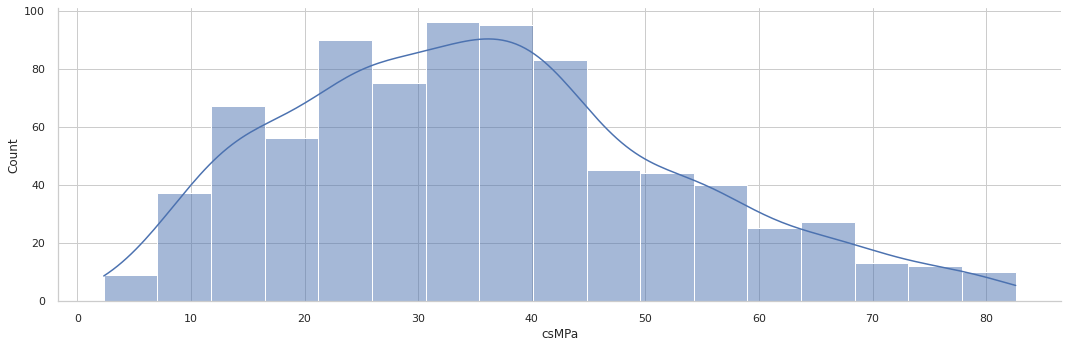

In [10]:
sns.set_theme()
sns.set_style("whitegrid")
# Create a countplot for csMPa feature
sns.displot(data=concrete_master_data, x='csMPa', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the distribution of age?**

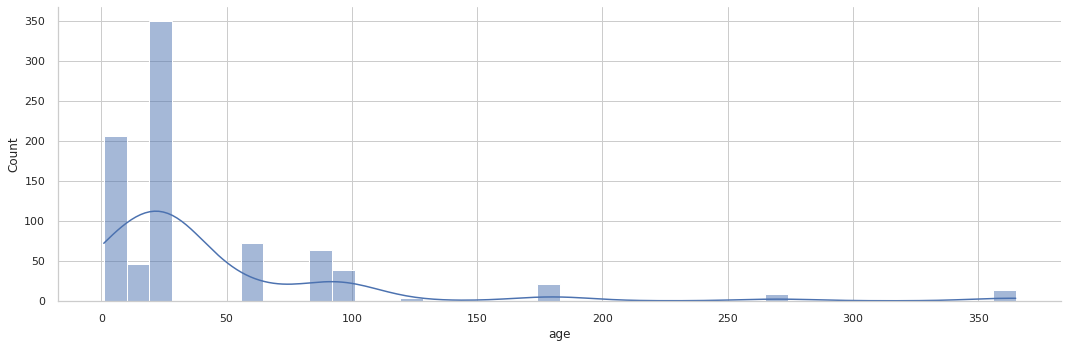

In [13]:
sns.displot(data=concrete_master_data, x='age', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the distribution of water?**


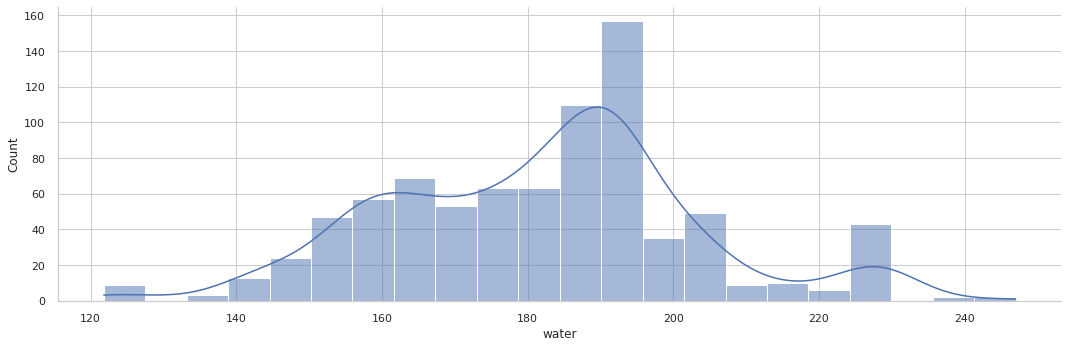

In [14]:
sns.displot(data=concrete_master_data, x='water', kde=True, height=5, aspect=3)
plt.show()

**Q: What is the relationship of age and cement?**

Text(0.5, 0, 'Age')

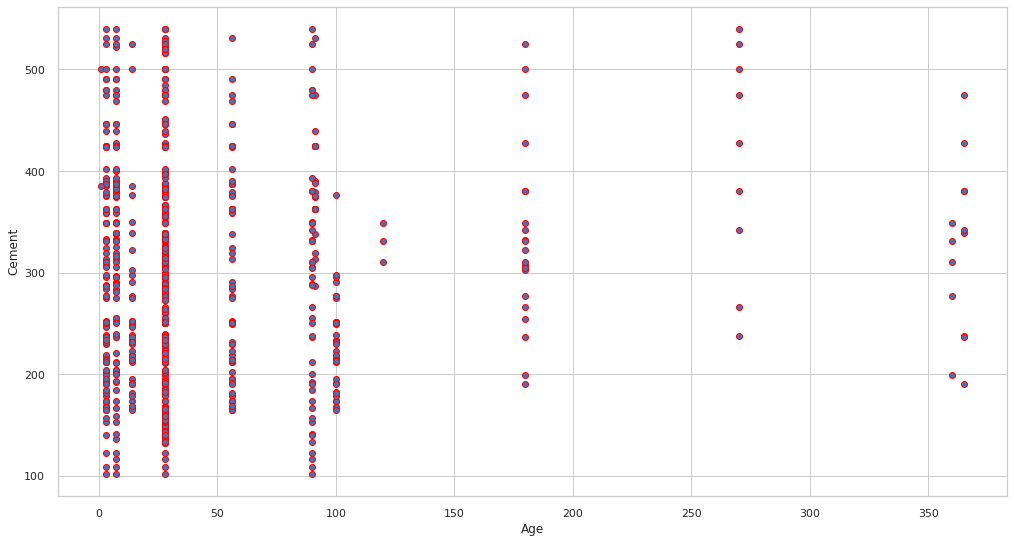

In [20]:
# scatter plot of Age and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='cement',x='age',edgecolors='red',data=concrete_master_data)
plt.ylabel('Cement')
plt.xlabel('Age')

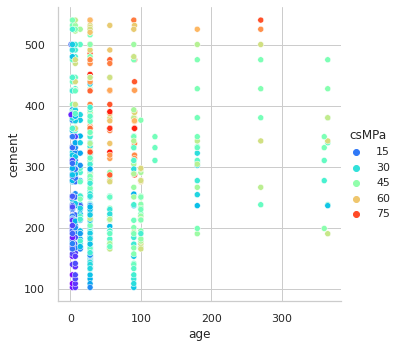

In [15]:
sns.relplot(data=concrete_master_data, x="age", y='cement',hue="csMPa", palette='rainbow')

**Q: What is the relationship of water and cement?**

Text(0.5, 0, 'water')

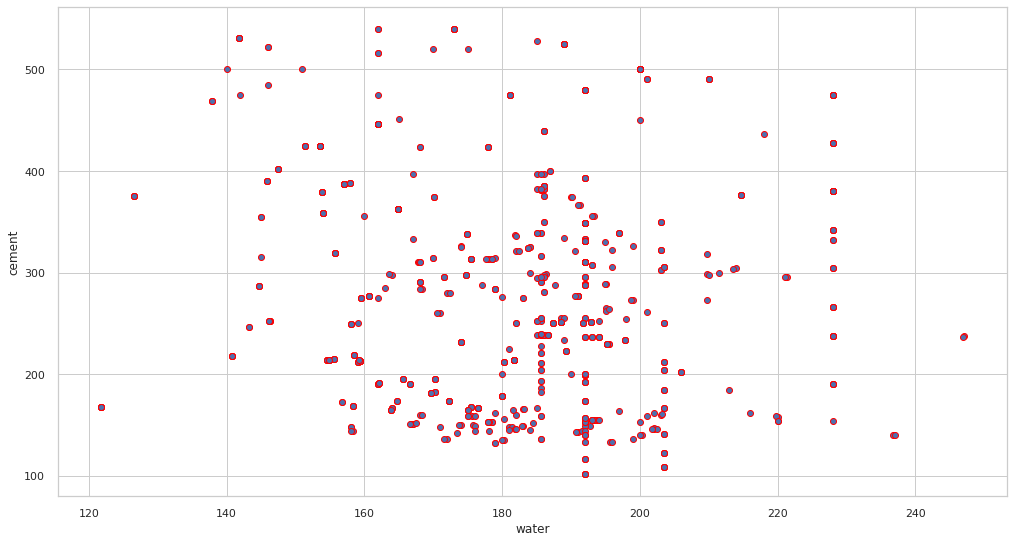

In [22]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='cement',x='water',edgecolors='red',data=concrete_master_data)
plt.ylabel('cement')
plt.xlabel('water')

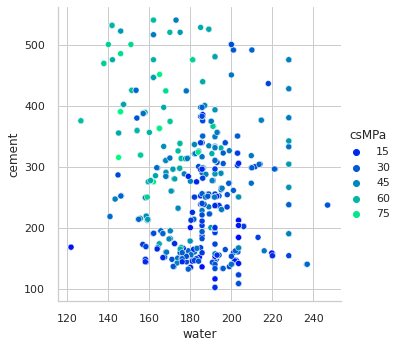

In [18]:
sns.relplot(data=concrete_master_data, x="water", y='cement',hue="csMPa", palette='winter')

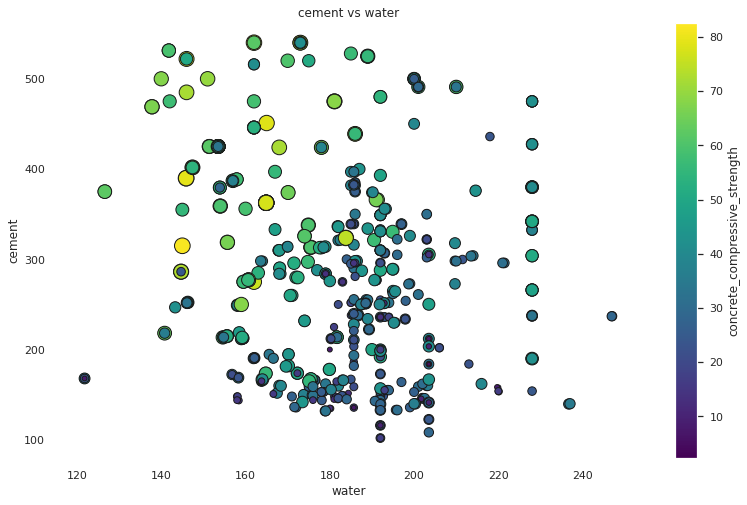

In [44]:
# Scatterplot between components
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(concrete_master_data["water"],concrete_master_data["cement"],
            c=concrete_master_data["csMPa"],s=concrete_master_data["csMPa"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("concrete_compressive_strength")
plt.title("cement vs water")
plt.show()

**Q: What is the relationship of water and age?**

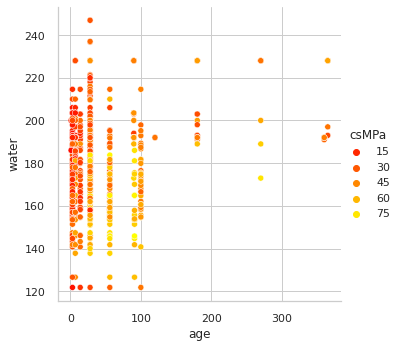

In [23]:
sns.relplot(data=concrete_master_data, x="age", y='water',hue="csMPa", palette='autumn')

Text(0.5, 0, 'Age')

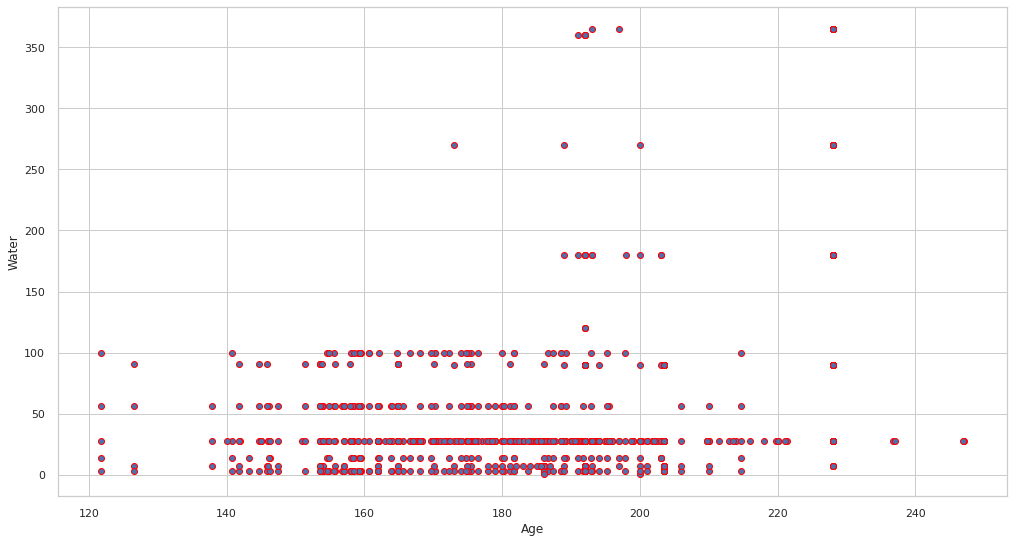

In [24]:
# scatter plot of Water and Age
plt.figure(figsize=[17,9])
plt.scatter(y='age', x='water',edgecolors='red',data=concrete_master_data)
plt.ylabel('Water')
plt.xlabel('Age')

pair plots for Numeric feature distribution to get different view point for better data understanding



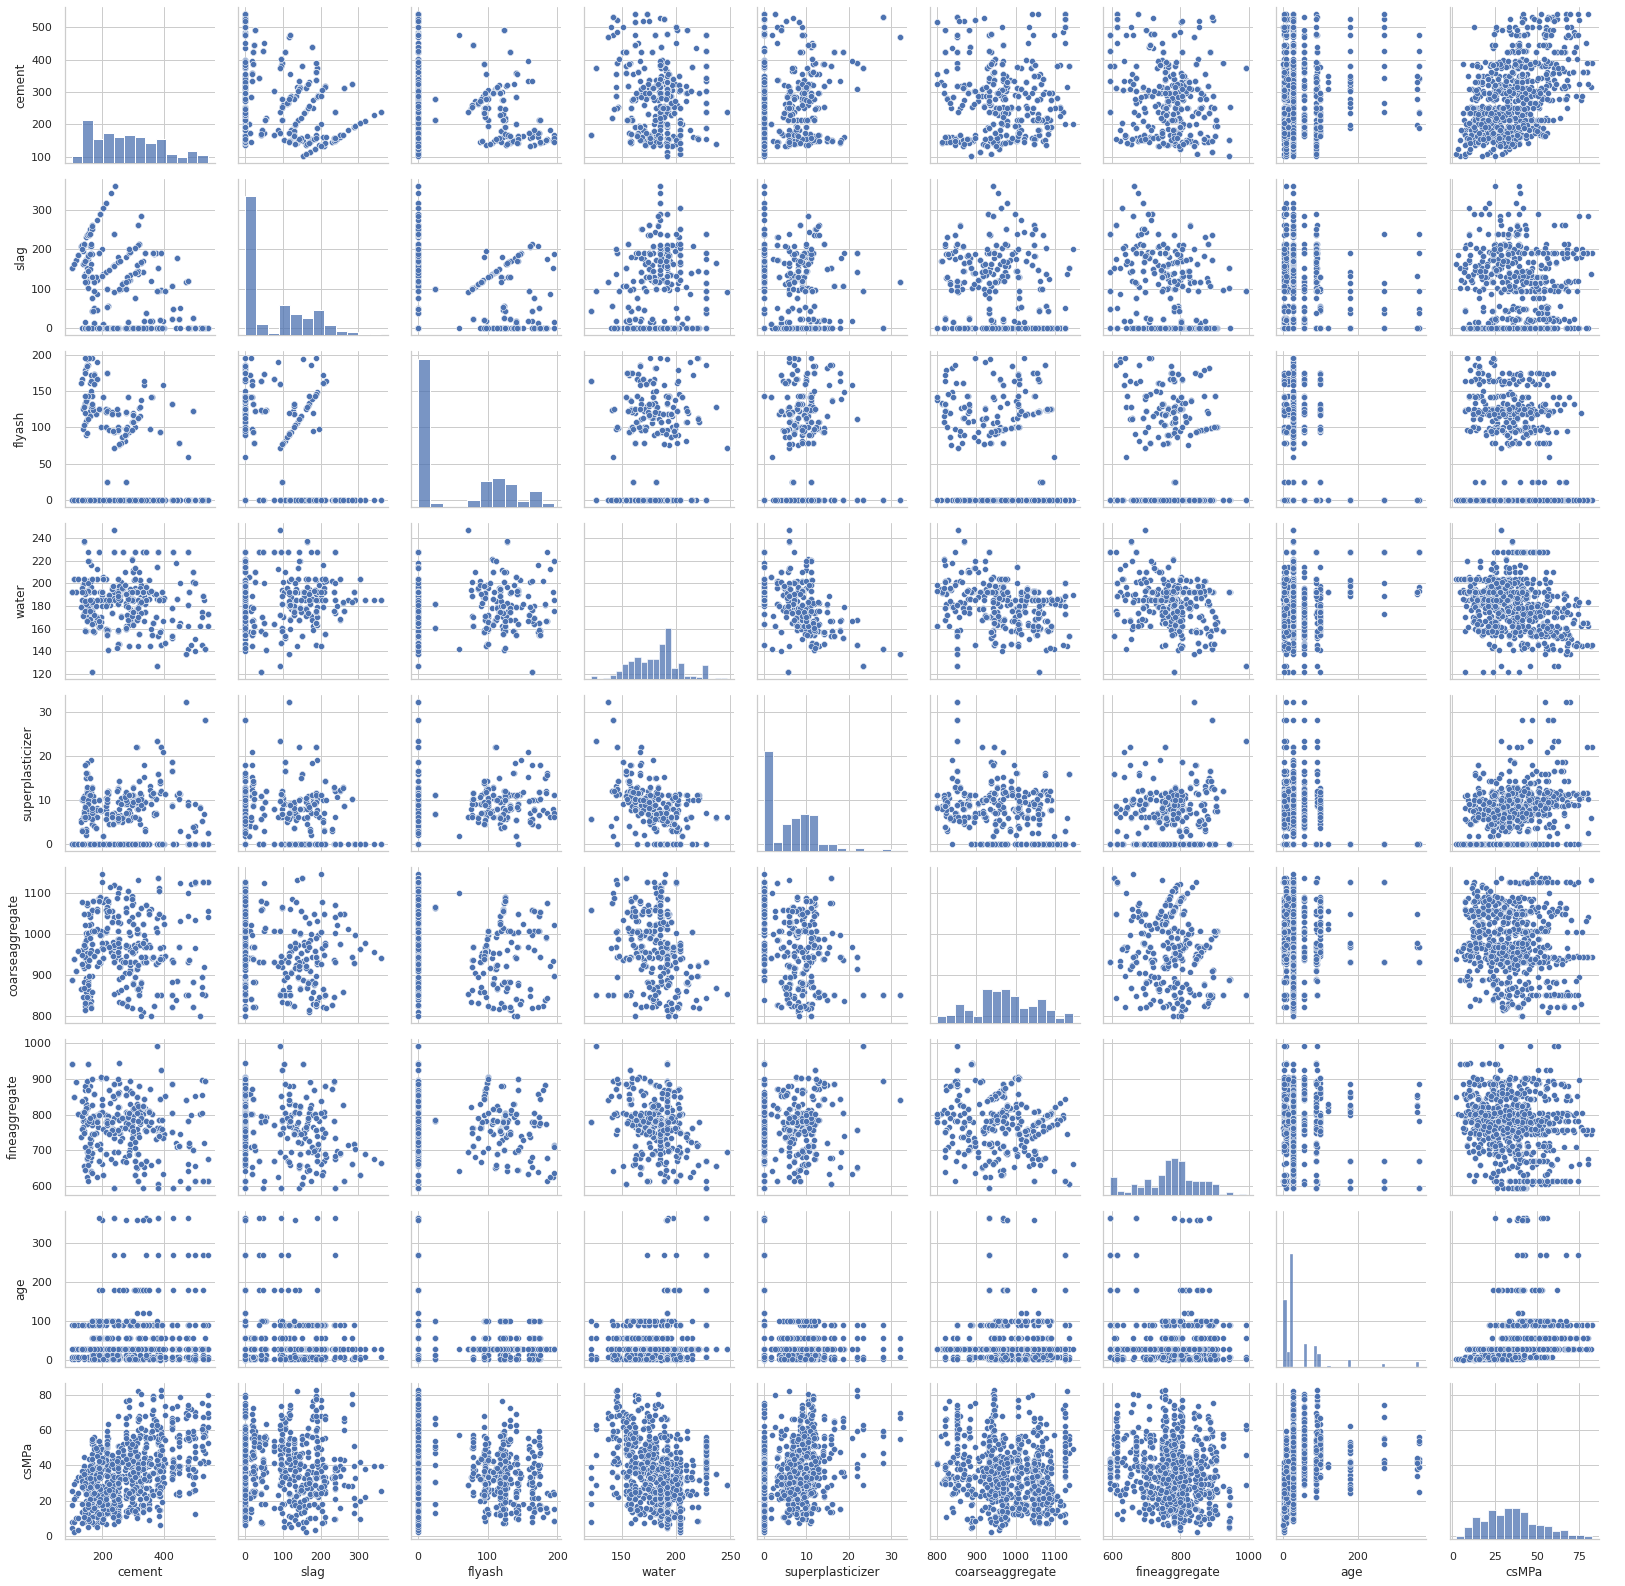

In [29]:
g = sns.PairGrid(concrete_master_data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.savefig('pairplot(cmd).png', orientation = 'horizontal')

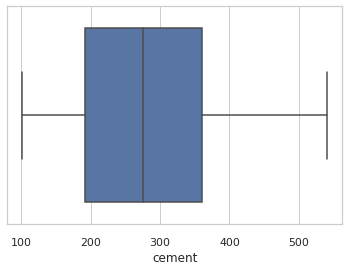

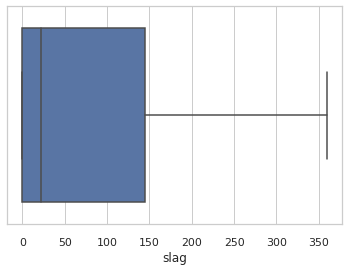

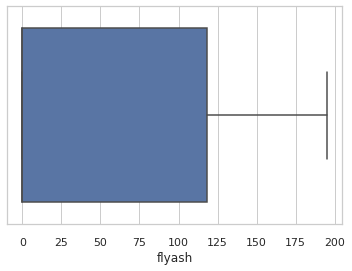

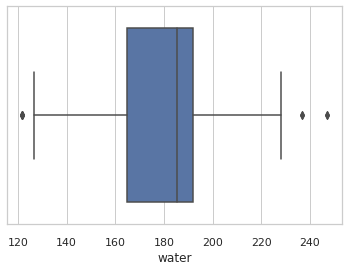

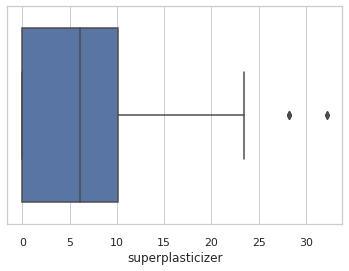

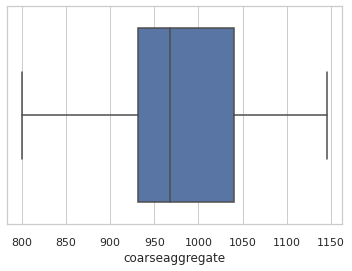

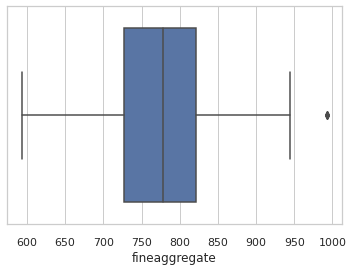

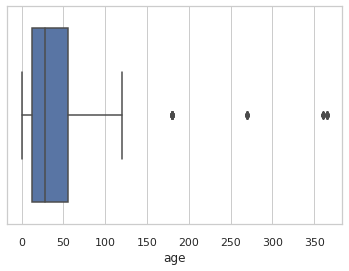

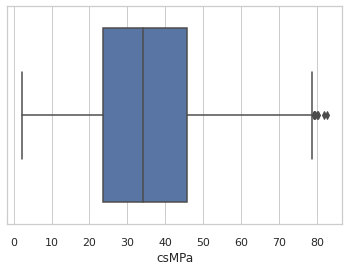

<Figure size 432x288 with 0 Axes>

In [30]:
l=['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa']
for i in l:
    sns.boxplot(x=concrete_master_data[i])
    plt.show()
    plt.savefig('boxplot(cmd).png', orientation = 'horizontal')

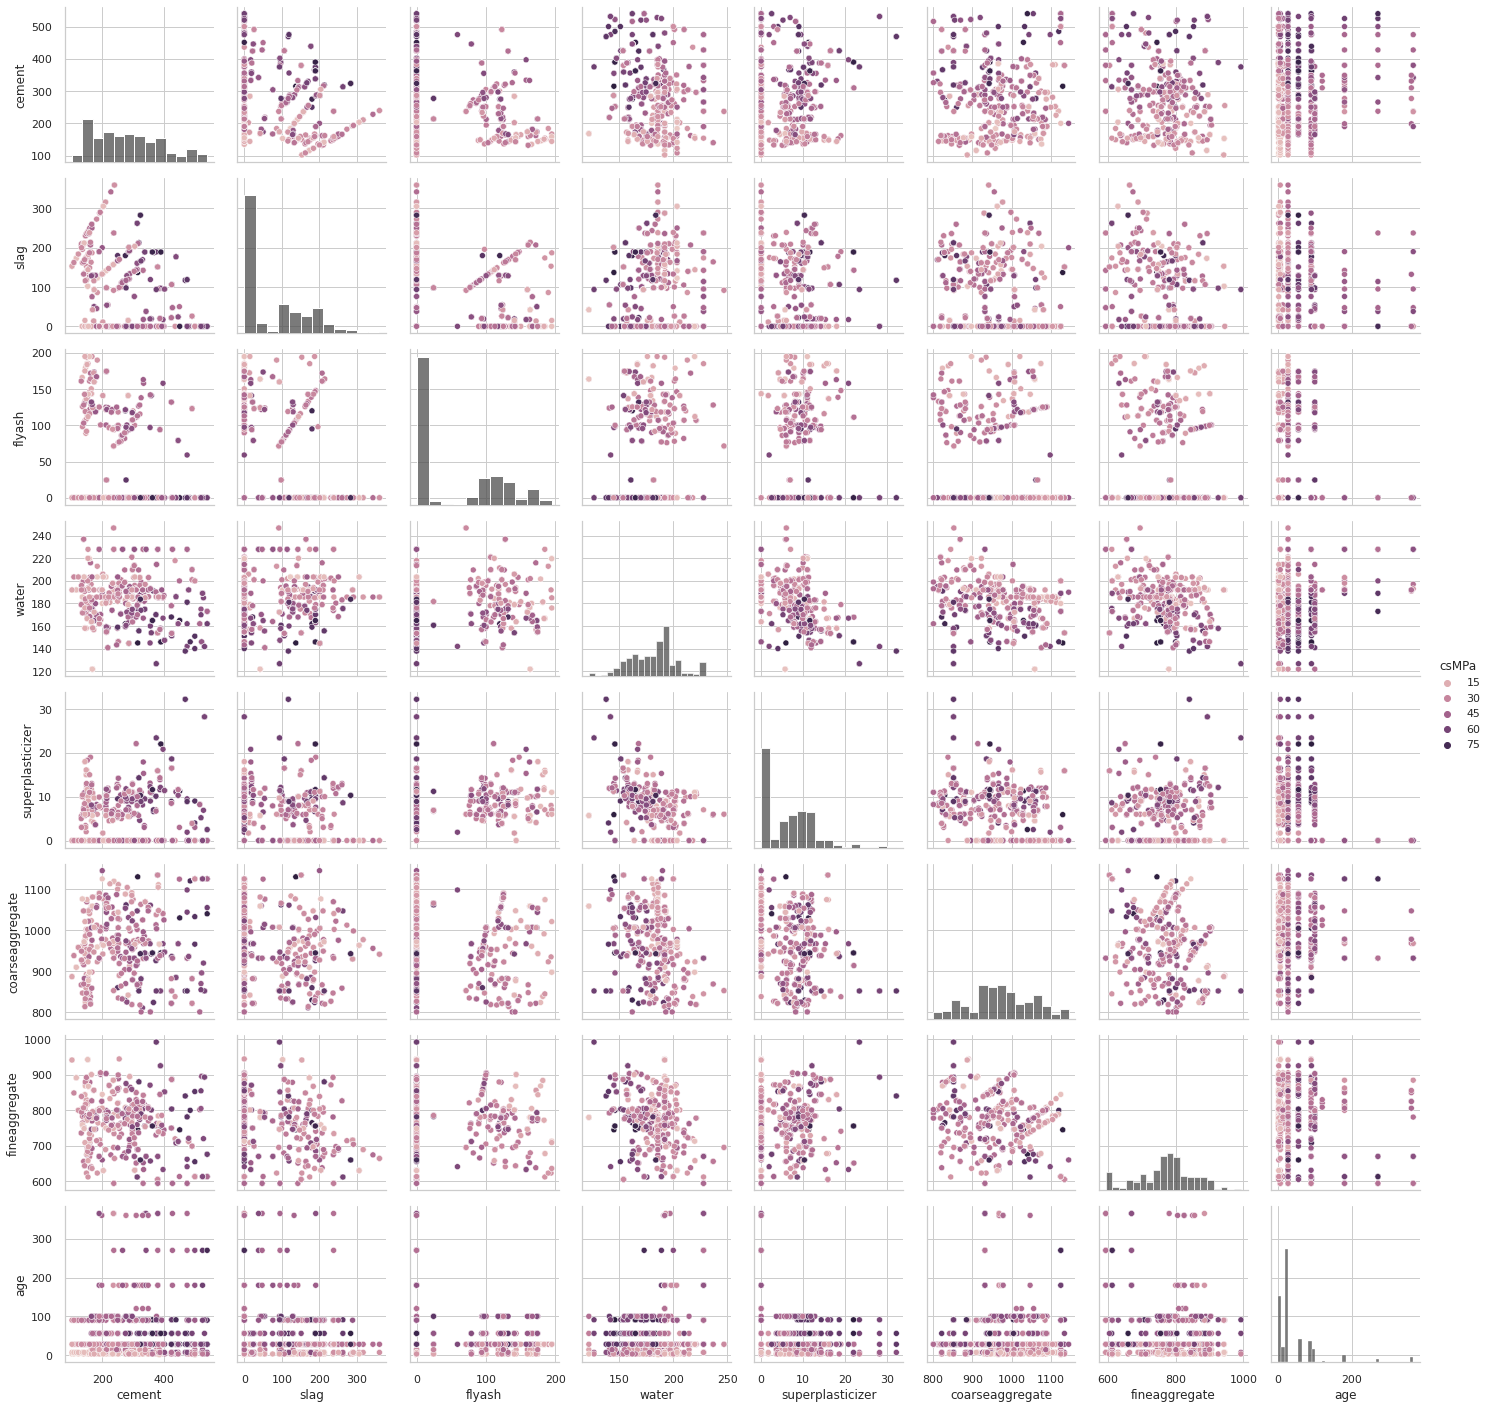

In [31]:
g = sns.PairGrid(concrete_master_data, hue='csMPa')
g.map_diag(sns.histplot,hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()
g.savefig('pairgrid(cmd).png', orientation = 'horizontal')

**Q: What is correlation of csMPa across various Numerical features**

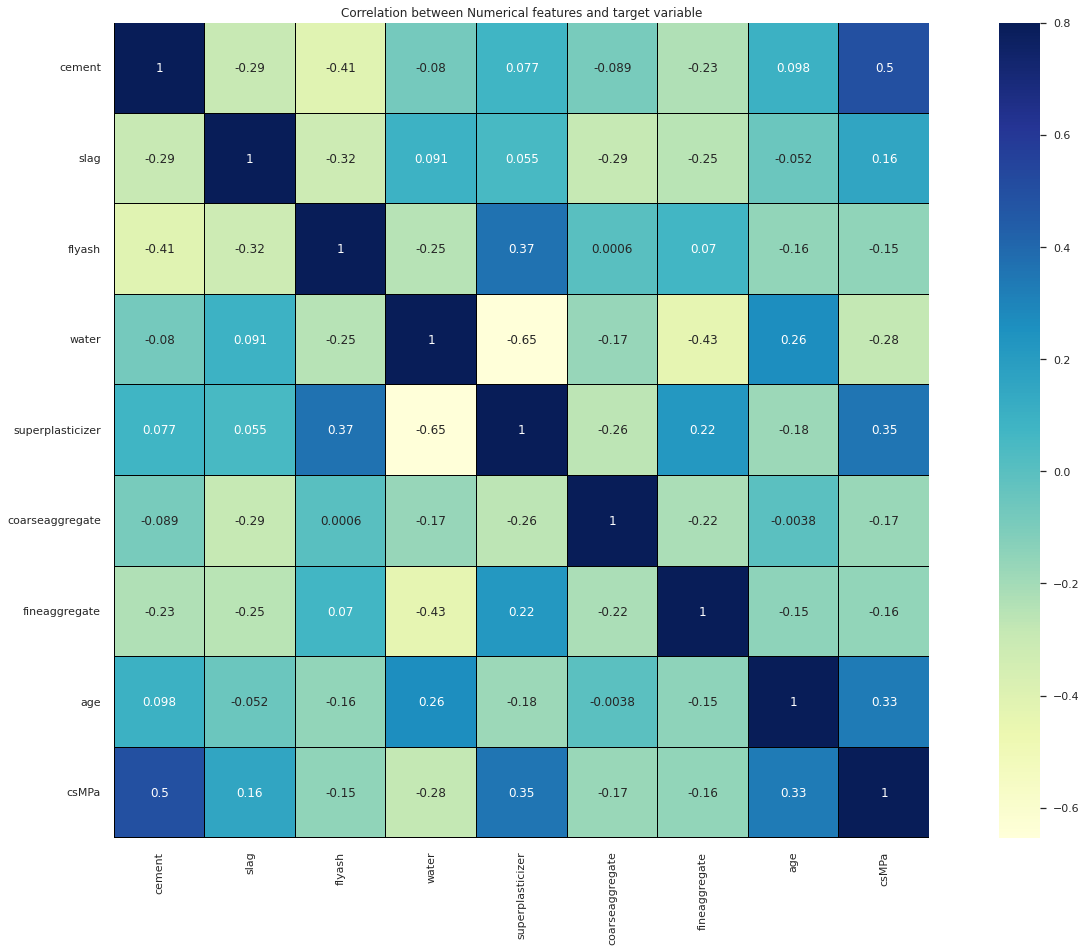

In [32]:
#Check correlation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = concrete_master_data.corr(method='pearson')
plt.figure(figsize=(25,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features and target variable')
plt.savefig('correlation.png')

**Observations:**

- There is very little positive correlation for csMPa with cement, superplasticizer and age
- There is very little negative correlation for csMPa with water
- There is very little positive correlation for water with age and superplasticizer with flyash
- There is slight negative correlation for water with superplasticizer
- There is very little negative correlation for cement with flyash and water with fineaggregate


In [33]:
#Covariance is a measure to indicate the extent to which two random variables change in tandem.
#Covariance can vary between -∞ and +∞
concrete_master_data.cov()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,11564.078158,-2735.312330,-2809.920846,-182.455461,49.502887,-753.741023,-1993.153561,634.717939,900.796218
slag,-2735.312330,7565.134988,-1758.019644,169.663404,28.773823,-1969.436821,-1774.325610,-271.480101,227.601385
flyash,-2809.920846,-1758.019644,4096.082726,-336.584853,139.702231,3.025004,362.535807,-606.974771,-161.635610
water,-182.455461,169.663404,-336.584853,454.623612,-83.183179,-284.864172,-750.382785,335.951990,-102.337587
superplasticizer,49.502887,28.773823,139.702231,-83.183179,35.608165,-123.515733,105.192624,-65.058391,35.554788
coarseaggregate,-753.741023,-1969.436821,3.025004,-284.864172,-123.515733,6192.844810,-1380.560639,-18.194479,-227.762259
fineaggregate,-1993.153561,-1774.325610,362.535807,-750.382785,105.192624,-1380.560639,6558.524332,-721.254477,-216.378645
age,634.717939,-271.480101,-606.974771,335.951990,-65.058391,-18.194479,-721.254477,3657.310489,338.691828
csMPa,900.796218,227.601385,-161.635610,-102.337587,35.554788,-227.762259,-216.378645,338.691828,284.431576


Text(0.5, 1.0, 'Distribution of concrete strength')

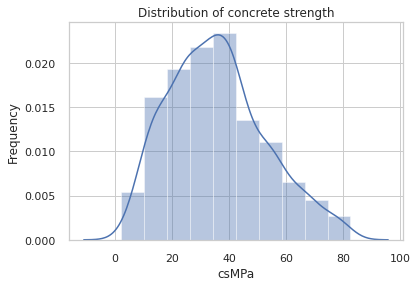

In [34]:
sns.distplot(concrete_master_data['csMPa'], bins=10, color='b')
plt.ylabel("Frequency")
plt.title('Distribution of concrete strength')

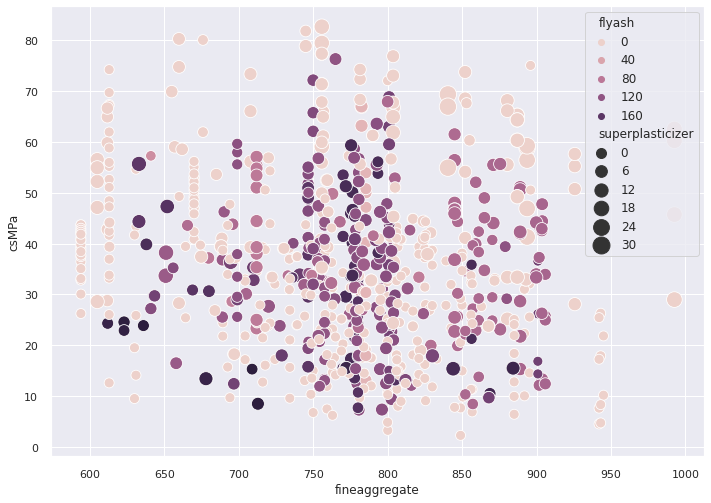

In [43]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash",
   size="superplasticizer", data=concrete_master_data, ax=None, sizes=(100, 300))

1. Compressive strength decreases Fly ash increases, as darker dots are concentrated in the region representing low compressive strength.
2. Compressive strength increases with Superplasticizer since larger the dot the higher they are in the plot.


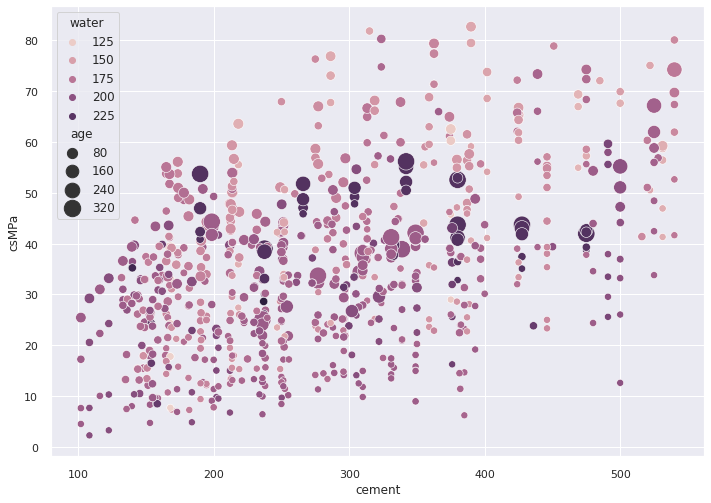

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(y="csMPa", x="cement", hue="water",size="age", data=concrete_master_data, sizes=(50, 300))

1) Compressive strength increases as the amount of cement increases, as the dots move up when we move towards right on the x-axis.<br>
2) Compressive strength increases with age (as the size of dots represents the age), this not the case always but can be up to an extent.<br>
3) Cement with less age requires more cement for higher strength, as the smaller dots are moving up when we move towards right on the x-axis.<br>
4) The older the cement is the more water it requires, can be confirmed by observing the colour of the dots. Larger dots with dark colour indicate high age and more water.<br>
5) Concrete strength increases when less water is used in preparing it since the dots on the lower side (y-axis) are darker and the dots on higher-end (y-axis) are brighter.

##**7. Data Post-Processing**

7.1 Feature Selection


In [8]:
y= concrete_master_data['csMPa']

In [9]:
concrete_master_data.drop(columns='csMPa', inplace=True)

In [10]:
concrete_master_data.shape

(824, 8)

In [11]:
# # Saving all feature names to a list in a variable
import sklearn.preprocessing
dataColumns = concrete_master_data.columns.to_list()

encoder = StandardScaler()
for i in dataColumns:
    concrete_master_data[i] = encoder.fit_transform(concrete_master_data[[i]])
print('Success!')

Success!


In [13]:
test_dataColumns = concrete_test_data.columns.to_list()

encoder = StandardScaler()
for i in test_dataColumns:
    concrete_test_data[i] = encoder.fit_transform(concrete_test_data[[i]])
print('Success!')

Success!


In [14]:
from sklearn.feature_selection import SelectFromModel               # To select features from model using Yellow bricks
from yellowbrick.model_selection import FeatureImportances 
from sklearn.ensemble import RandomForestRegressor 

selector = SelectFromModel(RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = -1))
selector.fit(concrete_master_data, y)

# # Extracting list of important features
selected_feat = concrete_master_data.columns[(selector.get_support())].tolist()
print('Total Features Selected are', len(selected_feat))

# # Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.12
Features: ['cement', 'water', 'age']


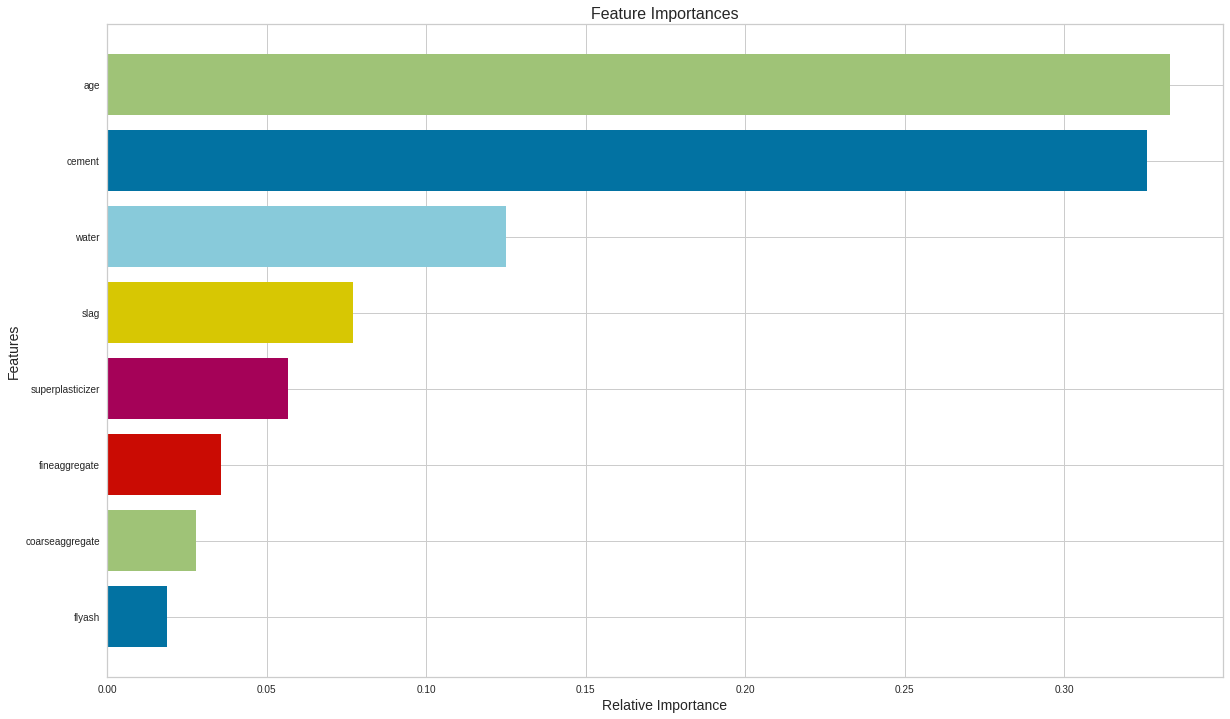

In [15]:
figure = plt.figure(figsize = [20, 12])

# # If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(concrete_master_data, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

###**7.2 Data Preparation**
Now we will split our data into dependent and independent variables for further development using holdout validation technique.

In [16]:
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(concrete_master_data, y, test_size=0.25, random_state=42)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (618, 8)
y_train shape:  (618,)
X_test shape:  (206, 8)
y_test shape:  (206,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 216 to 357
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            618 non-null    float64
 1   slag              618 non-null    float64
 2   flyash            618 non-null    float64
 3   water             618 non-null    float64
 4   superplasticizer  618 non-null    float64
 5   coarseaggregate   618 non-null    float64
 6   fineaggregate     618 non-null    float64
 7   age               618 non-null    float64
dtypes: float64(8)
memory usage: 43.5 KB


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
Id,,,,,,,,
216,-0.865914,-0.855584,1.126285,-0.933743,0.626471,1.456529,0.376752,-0.275673
181,0.991329,1.318705,-0.831134,-1.684600,2.655434,-0.366811,-0.201486,0.766700
242,-0.499304,-0.855584,1.016844,0.628980,-0.010724,0.693625,-0.179246,0.187604
574,-1.373958,1.485515,-0.831134,0.183158,-1.033590,1.305220,-0.158242,-0.623131
170,0.979232,0.261471,-0.831134,-1.121457,0.995373,-1.544226,1.897715,0.766700


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_jobs=-1))])

param_grid = {
    'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

search = GridSearchCV(pipe,param_grid,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('transform', PowerTransformer()),
                                       ('knn',
                                        KNeighborsRegressor(n_jobs=-1))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [18]:
search.best_params_

{'knn__n_neighbors': 3}

In [19]:
search.best_score_

0.8267910402336799

In [20]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [21]:
pipe.fit(X_train, y_train)
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

In [22]:
pipe.fit(X_train, y_train)
pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

In [23]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, pred_train)
r2_score_test = r2_score(y_test, pred_test)

In [24]:
r2_score_train

0.8906437698961781

In [25]:
r2_score_test

0.8339835245215425

In [27]:
test_pred = pipe.predict(concrete_test_data)
#Here we will predict on Test Dataset (aka Real World Data) using KNN Regression model.

###7.3 Data Scaling
Here we can try various scaling options available to arrive at best option
Here I have decided to not do scaling as of now after trying with different scaling options

##8. Model Development & Evaluation

In this section we will develop a KNN Regression

Then we will analyze the results obtained and make our observations.

For evaluation purpose we will focus on RMSE Score score as required by this project.


###8.1 Baseline Model Development & Evaluation
Here we will develop pipeline using KNN Regression model using K=3


In [28]:
knn_pipe = Pipeline(steps=[("scale", StandardScaler()),
                       ("transform", PowerTransformer()),
("knn", KNeighborsRegressor(n_neighbors=3,n_jobs=-1))])

knn_pipe.fit(X_train, y_train)
cv_score= cross_val_score(knn_pipe, X_train, y_train, cv=10, scoring='r2')
print(cv_score)
print("Average R2")
print(np.mean(cv_score))

[0.81762563 0.7736274  0.79757443 0.80640649 0.83065539 0.77915973
 0.86082089 0.84905679 0.85850496 0.89447869]
Average R2
0.8267910402336799


In [29]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('transform', PowerTransformer()),
  ('knn', KNeighborsRegressor(n_jobs=-1, n_neighbors=3))],
 'verbose': False,
 'scale': StandardScaler(),
 'transform': PowerTransformer(),
 'knn': KNeighborsRegressor(n_jobs=-1, n_neighbors=3),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'transform__copy': True,
 'transform__method': 'yeo-johnson',
 'transform__standardize': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': -1,
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [30]:
y_pred_train = knn_pipe.predict(X_train)
y_pred_test = knn_pipe.predict(X_test)

In [31]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [32]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 3.3116181229773463
MAE for test set is 4.712669902912622


In [33]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [34]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 20.406092125134844
MSE for test set is 41.93040706580367


In [35]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [36]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 4.517310275499663
RMSE for test set is 6.475369260961391


In [37]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [38]:
r2_score_train

0.9263656906718045

In [39]:
r2_score_test

0.8624894870780313

In [40]:
#Here we will do prediction on Test Dataset (Real World Data) using KNN Regression model.
y_test_pred = pipe.predict(concrete_test_data)

In [41]:
output = pd.DataFrame({'Id': concrete_test_data.index,'csMPa': test_pred})
output.to_csv('concrete-compressive-strenth-submission1.csv', index=False, header=False)

In [42]:
output = pd.DataFrame({'Id': concrete_test_data.index,'csMPa': y_test_pred})
output.to_csv('concrete-compressive-strenth-submission2.csv', index=False, header=False)

##**9.1 Conclusion**
KNN Regression Model was used for prediction considering this is ML Advanced project.
RMSE Score was used to arrive at model evaluation which is required for this ML Advanced Project.
